# TFM
# Modelo Random Forest

Realizado por: Paola Monar <br>
Fecha: ENERO/2025

# Modelo de Random Forest: Explicación, Utilidad e Importancia
El **Random Forest** es un algoritmo de aprendizaje automático basado en la creación de múltiples árboles de decisión. Es un modelo de tipo ensemble, lo que significa que combina los resultados de varios modelos (en este caso, árboles de decisión) para mejorar la precisión y la robustez de las predicciones.

En términos simples, **Random Forest**:
1. Construye una gran cantidad de árboles de decisión independientes durante el entrenamiento.
2. Para un problema de clasificación, utiliza el voto mayoritario de los árboles para determinar la clase final.
3. Para un problema de regresión, calcula el promedio de las predicciones de todos los árboles.

El modelo introduce dos mecanismos clave para reducir el sobreajuste y aumentar la generalización:
- **Bootstrap Aggregating (Bagging):** Los árboles se entrenan en diferentes subconjuntos de datos seleccionados aleatoriamente.
- **Selección Aleatoria de Características:** Cada árbol utiliza solo un subconjunto aleatorio de características en cada división, promoviendo la diversidad entre los árboles.
---

## Utilidad de Random Forest

El **Random Forest** es ampliamente utilizado en problemas tanto de clasificación como de regresión debido a sus múltiples ventajas:

### Aplicaciones:
1. **Clasificación:** Identificación de categorías en datos complejos (por ejemplo, detección de fraudes, diagnóstico médico).
2. **Regresión:** Predicción de valores continuos (por ejemplo, estimación de precios, pronósticos de demanda).
3. **Selección de Características:** Evalúa la importancia de cada característica en la predicción, ayudando a identificar las más relevantes.
4. **Problemas Multivariantes:** Maneja eficientemente datos con múltiples variables y relaciones no lineales.

### Ventajas:
1. **Reducción del Sobreajuste:** Gracias a su enfoque en múltiples árboles y el uso de bagging, Random Forest es menos propenso al sobreajuste en comparación con un solo árbol de decisión.
2. **Generalización:** Tiene un buen desempeño incluso con datos de alta dimensionalidad.
3. **Robustez:** Es resistente a valores atípicos y datos ruidosos.
4. **Facilidad de Interpretación:** Proporciona métricas como la importancia de las características, que pueden ser útiles para el análisis de datos.
---
## Importancia de Random Forest

El **Random Forest** es importante porque:
1. **Versatilidad:** Se adapta bien a diferentes tipos de datos y problemas, siendo una opción confiable en una amplia variedad de escenarios.
2. **Eficiencia:** Aunque es un modelo complejo, es relativamente eficiente en términos de computación y escalabilidad.
3. **Solidez:** Maneja bien conjuntos de datos incompletos, variables categóricas y problemas con gran cantidad de características.
4. **Capacidad de Interpretación:** Al evaluar la importancia de las variables, puede ser útil para entender los factores clave que afectan un fenómeno.
---

### Importación de librerías

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Explicación de Librerías Utilizadas

Este proyecto utiliza diversas librerías de Python, cada una con un propósito específico en el análisis, visualización y modelado de datos. A continuación, se describe brevemente la utilidad de cada una:

---

## 1. **`pandas`**
- **Importación:** `import pandas as pd`
- **Descripción:** 
  - Librería fundamental para el manejo y análisis de datos estructurados (tablas).
  - Proporciona herramientas para cargar, manipular y analizar datos en formatos como CSV, Excel, entre otros.
- **Utilidad en el proyecto:** Manejo de DataFrames para procesar los datos de entrada y salida.

---

## 2. **`seaborn`**
- **Importación:** `import seaborn as sns`
- **Descripción:**
  - Librería de visualización de datos basada en `matplotlib`.
  - Ofrece gráficos estéticamente agradables y herramientas para análisis exploratorio.
- **Utilidad en el proyecto:** Visualización de distribuciones y relaciones entre variables.

---

## 3. **`matplotlib.pyplot`**
- **Importación:** `import matplotlib.pyplot as plt`
- **Descripción:**
  - Librería para crear gráficos 2D.
  - Proporciona un control detallado sobre el diseño y estilo de los gráficos.
- **Utilidad en el proyecto:** Crear gráficos personalizados para comparar valores reales y predicciones.

---

## 4. **`numpy`**
- **Importación:** `import numpy as np`
- **Descripción:**
  - Librería para cálculos numéricos y manipulación de arreglos multidimensionales.
  - Es altamente eficiente para operaciones matemáticas en grandes volúmenes de datos.
- **Utilidad en el proyecto:** Gestión de cálculos matemáticos, como generación de coordenadas y operaciones en arrays.

---

## 5. **`sklearn.ensemble.RandomForestRegressor`**
- **Importación:** `from sklearn.ensemble import RandomForestRegressor`
- **Descripción:**
  - Implementación del algoritmo de Random Forest para problemas de regresión.
  - Construye múltiples árboles de decisión para realizar predicciones precisas.
- **Utilidad en el proyecto:** Entrenamiento y ajuste del modelo de regresión para predicciones.

---

## 6. **`sklearn.metrics`**
- **Importación:**
  ```python
  from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


### Descripción:
* Proporciona métricas para evaluar el desempeño de modelos de aprendizaje automático.
* Métricas utilizadas:
  - MAE (Mean Absolute Error): Promedio de los errores absolutos.
  - RMSE (Root Mean Squared Error): Raíz del error cuadrático medio.
- MAPE (Mean Absolute Percentage Error): Error porcentual promedio.
* Utilidad en el proyecto: Evaluar la precisión del modelo antes y después del ajuste.

### Cargar el Dataset

In [4]:
# Specify the path to your Excel file
file_path = "https://github.com/huambra/Predicting-Shrimp-Exports/raw/refs/heads/main/Exports%20por%20Mercado.xlsx"

# Read the Excel file
df = pd.read_excel(file_path, sheet_name="Unpivot")

# Display the first few rows of the dataframe
print(df.head())

        Date  China   USA    UE
0 2012-12-01   19.0   291    75
1 2013-01-01  740.0  4119  4241
2 2013-02-01  380.0  5844  5407
3 2013-03-01  459.0  6929  7510
4 2013-04-01  403.0  7266  7830


## PASOS PARA CARGAR DATASET
* Define la ubicación del archivo Excel. Puede ser un archivo local o una URL (como en este caso).
* En este caso, el archivo está alojado en un repositorio de GitHub.
* Usa la función pd.read_excel para cargar el archivo Excel.
* Especifica la hoja que deseas cargar con el parámetro sheet_name. Aquí se utiliza la hoja llamada "Unpivot".

In [5]:
df

,Date,China,USA,UE
0,2012-12-01,19.0,291,75
1,2013-01-01,740.0,4119,4241
2,2013-02-01,380.0,5844,5407
3,2013-03-01,459.0,6929,7510
4,2013-04-01,403.0,7266,7830
...,...,...,...,...
136,2024-04-01,61599.0,18589,17849
137,2024-05-01,68663.0,24101,18514
138,2024-06-01,60804.0,14983,17458
139,2024-07-01,49431.0,15963,20369


### Caracteristicas del Dataset (EDA)

In [6]:
# Mostrar información general del dataset
print("Información del dataset:")
print(df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    141 non-null    datetime64[ns]
 1   China   141 non-null    float64       
 2   USA     141 non-null    int64         
 3   UE      141 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 4.5 KB
None


El dataset contiene 141 registros y 4 columnas: Date, China, USA y UE. La columna Date es de tipo datetime64[ns], indicando que los datos están relacionados con fechas o tiempos. Las columnas China (float64), USA (int64) y UE (int64) contienen valores numéricos, siendo la primera de tipo decimal y las otras enteras. No hay valores nulos en ninguna columna, lo que asegura consistencia en los datos, y el uso de memoria es ligero, de aproximadamente 4.5 KB. Es probable que las columnas China, USA y UE representen indicadores asociados a estas regiones, y Date permite analizar tendencias temporales. Se podrían realizar análisis como comparar valores entre las regiones, identificar correlaciones y detectar patrones en el tiempo.

In [7]:
# Describir las estadísticas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Estadísticas descriptivas:
                                Date         China           USA            UE
count                            141    141.000000    141.000000    141.000000
mean   2018-10-01 02:22:58.723404288  21722.612464  10762.780142  10523.546099
min              2012-12-01 00:00:00     19.000000    291.000000     75.000000
25%              2015-11-01 00:00:00    977.000000   6089.000000   7156.000000
50%              2018-10-01 00:00:00  11356.000000   7837.000000   9404.000000
75%              2021-09-01 00:00:00  43267.000000  15184.000000  13267.000000
max              2024-08-01 00:00:00  70663.000000  39246.000000  29692.000000
std                              NaN  22768.348255   6432.901489   4644.267884

Valores nulos por columna:
Date     0
China    0
USA      0
UE       0
dtype: int64


El análisis del dataset muestra que contiene 141 registros sin valores nulos en las columnas Date, China, USA y UE. Las estadísticas descriptivas revelan que para la columna China, los valores varían entre un mínimo de 19 y un máximo de 70,663, con una media de 21,722.61 y una desviación estándar de 22,768.35, indicando alta variabilidad. En la columna USA, los valores oscilan entre 291 y 39,246, con una media de 10,762.78 y una desviación estándar de 6,432.90. Para la columna UE, los datos van de 75 a 29,692, con una media de 10,523.54 y una desviación estándar de 4,644.27. La columna Date cubre un rango temporal desde diciembre de 2012 hasta agosto de 2024, permitiendo analizar tendencias a largo plazo. Los percentiles (25%, 50% y 75%) sugieren una distribución asimétrica en los valores de las regiones, lo que podría reflejar diferencias significativas en los indicadores representados.

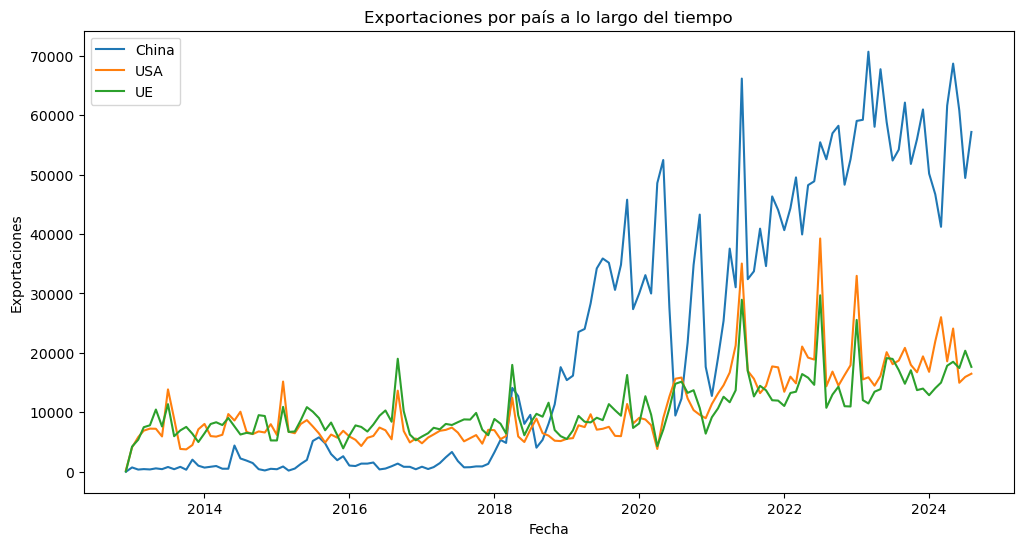

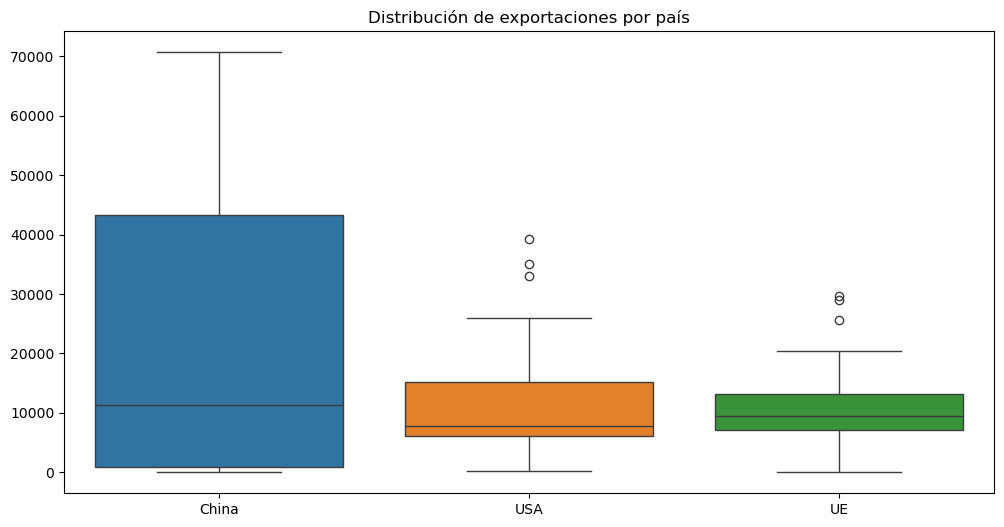

In [8]:
# Visualizar las series temporales
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['China'], label='China')
plt.plot(df['Date'], df['USA'], label='USA')
plt.plot(df['Date'], df['UE'], label='UE')
plt.xlabel('Fecha')
plt.ylabel('Exportaciones')
plt.title('Exportaciones por país a lo largo del tiempo')
plt.legend()
plt.show()

# Visualizar la distribución de los datos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['China', 'USA', 'UE']])
plt.title('Distribución de exportaciones por país')
plt.show()



Las gráficas analizadas muestran el comportamiento de las exportaciones en China, USA y la Unión Europea a lo largo del tiempo y su distribución general. En la primera gráfica, se observa que las exportaciones de China han tenido un crecimiento significativo desde 2018, alcanzando picos superiores a 70,000 unidades en 2024, lo que sugiere una tendencia alcista constante y volátil. Por otro lado, las exportaciones de USA y la UE presentan variaciones más estables y moderadas, con valores máximos significativamente menores en comparación con China. En la segunda gráfica, el boxplot resalta que China tiene una mayor dispersión en sus exportaciones, con un rango intercuartil amplio y valores extremos elevados, mientras que USA y la UE tienen distribuciones más compactas, aunque ambas muestran algunos valores atípicos. Esto indica que China domina en términos de volumen y volatilidad, mientras que las exportaciones de USA y la UE son más consistentes y predecibles.

### Preprocesamiento del Dataset


In [9]:
# Dividir el dataframe por país y establecer la columna 'Date' como índice
df_china = df[['Date', 'China']].set_index('Date')
df_usa = df[['Date', 'USA']].set_index('Date')
df_ue = df[['Date', 'UE']].set_index('Date')

# Mostrar las primeras filas de cada dataframe
print("Datos de China:")
print(df_china.head())

print("\nDatos de USA:")
print(df_usa.head())

print("\nDatos de UE:")
print(df_ue.head())

Datos de China:
            China
Date             
2012-12-01   19.0
2013-01-01  740.0
2013-02-01  380.0
2013-03-01  459.0
2013-04-01  403.0

Datos de USA:
             USA
Date            
2012-12-01   291
2013-01-01  4119
2013-02-01  5844
2013-03-01  6929
2013-04-01  7266

Datos de UE:
              UE
Date            
2012-12-01    75
2013-01-01  4241
2013-02-01  5407
2013-03-01  7510
2013-04-01  7830


# Preprocesamiento del Dataset

Este código divide el dataset principal en tres subconjuntos basados en los países (**China**, **USA**, y **UE**) y establece la columna `Date` como índice en cada uno. Además, se imprimen las primeras filas de cada subconjunto para inspección.

---

## Código Explicado

### 1. **Dividir el DataFrame por País**
   ```python
   df_china = df[['Date', 'china']].set_index('Date')
   df_usa = df[['Date', 'USA']].set_index('Date')
   df_ue = df[['Date', 'UE']].set_index('Date')


### Utilidad del Preprocesamiento
* Preparar los Datos:

   - Se organiza el dataset en subconjuntos independientes para facilitar el análisis por país.
   - Establecer Date como índice permite realizar análisis temporales más fácilmente.
* Validar los Datos:
   - Inspeccionar las primeras filas garantiza que los datos se hayan separado correctamente y estén listos para el análisis posterior.
* Análisis Eficiente:
   - Dividir el dataset permite trabajar con cada país de manera individual y realizar comparaciones específicas entre ellos.

In [10]:
# Convertir índice a datetime
df_china.index = pd.to_datetime(df_china.index, format='%d/%m/%Y')
# Asegurar frecuencia mensual
df_china = df_china.asfreq('MS')  # MS = Start of Month

# Repetir con df_usa y df_ue si fuera necesario
df_usa.index = pd.to_datetime(df_usa.index, format='%d/%m/%Y')
df_usa = df_usa.asfreq('MS')

df_ue.index = pd.to_datetime(df_ue.index, format='%d/%m/%Y')
df_ue = df_ue.asfreq('MS')

In [11]:
# Definimos el tamaño del test, por ejemplo, 12 observaciones (12 meses)
n_test = 12

# 4.1. Para CHINA
train_china = df_china.iloc[:-n_test].copy()
test_china  = df_china.iloc[-n_test:].copy()

print("CHINA:")
print("Tamaño de entrenamiento:", train_china.shape)
print("Tamaño de prueba:", test_china.shape)
print("Fechas de entrenamiento:", train_china.index.min(), " a ", train_china.index.max())
print("Fechas de prueba:", test_china.index.min(), " a ", test_china.index.max())
print("-------------------------------------------------------\n")

# 4.2. Para USA
train_usa = df_usa.iloc[:-n_test].copy()
test_usa  = df_usa.iloc[-n_test:].copy()

print("USA:")
print("Tamaño de entrenamiento:", train_usa.shape)
print("Tamaño de prueba:", test_usa.shape)
print("Fechas de entrenamiento:", train_usa.index.min(), " a ", train_usa.index.max())
print("Fechas de prueba:", test_usa.index.min(), " a ", test_usa.index.max())
print("-------------------------------------------------------\n")

# 4.3. Para UE
train_ue = df_ue.iloc[:-n_test].copy()
test_ue  = df_ue.iloc[-n_test:].copy()

print("UE:")
print("Tamaño de entrenamiento:", train_ue.shape)
print("Tamaño de prueba:", test_ue.shape)
print("Fechas de entrenamiento:", train_ue.index.min(), " a ", train_ue.index.max())
print("Fechas de prueba:", test_ue.index.min(), " a ", test_ue.index.max())


CHINA:
Tamaño de entrenamiento: (129, 1)
Tamaño de prueba: (12, 1)
Fechas de entrenamiento: 2012-12-01 00:00:00  a  2023-08-01 00:00:00
Fechas de prueba: 2023-09-01 00:00:00  a  2024-08-01 00:00:00
-------------------------------------------------------

USA:
Tamaño de entrenamiento: (129, 1)
Tamaño de prueba: (12, 1)
Fechas de entrenamiento: 2012-12-01 00:00:00  a  2023-08-01 00:00:00
Fechas de prueba: 2023-09-01 00:00:00  a  2024-08-01 00:00:00
-------------------------------------------------------

UE:
Tamaño de entrenamiento: (129, 1)
Tamaño de prueba: (12, 1)
Fechas de entrenamiento: 2012-12-01 00:00:00  a  2023-08-01 00:00:00
Fechas de prueba: 2023-09-01 00:00:00  a  2024-08-01 00:00:00


### Función para Crear un Dataset Supervisado

La función create_lagged_features genera columnas adicionales en el dataset, correspondientes a los valores rezagados de la variable objetivo. Esto permite a los modelos supervisados considerar patrones históricos.

In [12]:
# Función para crear un dataset supervisado
def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in range(1, lags + 1):
        df_lagged[f'lag_{lag}'] = df['Value'].shift(lag)
    df_lagged = df_lagged.dropna()
    return df_lagged


Esta función realiza las siguientes tareas:

1. Hace una copia del dataset original para evitar modificaciones accidentales
2. Genera columnas adicionales, llamadas lag_1, lag_2, ..., lag_n, donde n es el número de rezagos definidos.
3. Elimina las filas con valores nulos generados por los rezagos para obtener un dataset limpio.

### PREPARACIÓN DEL DATASET

A continuación, se preparan los datasets individuales para cada región (China, USA, UE). Esto implica seleccionar las columnas necesarias, renombrarlas y organizar los datos temporalmente.

In [13]:
# Preparar los datasets individuales
df_china = df[['Date', 'China']].rename(columns={'China': 'Value'}).set_index('Date')
df_usa = df[['Date', 'USA']].rename(columns={'USA': 'Value'}).set_index('Date')
df_ue = df[['Date', 'UE']].rename(columns={'UE': 'Value'}).set_index('Date')



Pasos realizados:

1. Seleccionar únicamente las columnas relevantes: Date y los valores de cada región (China, USA, UE).
2. Renombrar la columna de valores como Value, asegurando consistencia en los nombres.
3. Establecer la columna Date como índice para preservar la organización temporal de los datos.

### CREACIÓN DE CARACTERÍSTICAS CON REZAGOS

Para cada uno de los datasets regionales, se generan las características rezagadas utilizando la función create_lagged_features. En este ejemplo, se utilizan 12 meses como número de rezagos.

In [14]:
# Crear características con rezagos
lags = 12  # Usamos los últimos 12 meses como características
china_lagged = create_lagged_features(df_china, lags)
usa_lagged = create_lagged_features(df_usa, lags)
ue_lagged = create_lagged_features(df_ue, lags)

Detalles de este paso:
1. Se define la cantidad de rezagos (lags = 12), representando un año de datos históricos.
2. Se aplica la función a cada dataset regional (df_china, df_usa, df_ue) para generar las columnas rezagadas.
3. El resultado es un dataset enriquecido para cada región, listo para ser usado en un modelo de aprendizaje supervisado.

### SPLIT DE DATOS RANDOM FOREST

In [15]:
# Dividir en variables independientes (X) y dependientes (y)
def split_data(df):
    X = df.drop(columns=['Value'])
    y = df['Value']
    return train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_train_china, X_test_china, y_train_china, y_test_china = split_data(china_lagged)
X_train_usa, X_test_usa, y_train_usa, y_test_usa = split_data(usa_lagged)
X_train_ue, X_test_ue, y_train_ue, y_test_ue = split_data(ue_lagged)

# División de Datos para Entrenamiento y Pruebas en Random Forest

En esta sección, se realiza la división de los datos en conjuntos de entrenamiento y prueba, tanto para las variables independientes (`X`) como para las dependientes (`y`). Esto es un paso crucial para evaluar el desempeño de modelos supervisados, como Random Forest.

---

## Función para Dividir los Datos

La función `split_data` divide un dataset en variables independientes (`X`) y dependientes (`y`), y luego utiliza la función `train_test_split` para crear los conjuntos de entrenamiento y prueba.

```python
def split_data(df):
    """
    Divide el dataset en variables independientes (X) y dependientes (y),
    y realiza una división en conjuntos de entrenamiento y prueba.

    Parámetros:
    df (pd.DataFrame): DataFrame con las características y la variable objetivo.

    Retorna:
    tuple: X_train, X_test, y_train, y_test (conjuntos de entrenamiento y prueba).
    """
    X = df.drop(columns=['Value'])  # Variables independientes
    y = df['Value']  # Variable dependiente
    return train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


### MODELADO Y EVALUACIÓN CON RANDOM FOREST

In [16]:
# esta celda es el modelado de RF
# Función para entrenar y evaluar el modelo
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mape = mean_absolute_percentage_error(y_test, predictions) * 100

    return model, mae, rmse, mape

# Modelado y Evaluación con Random Forest

En esta sección, se entrena un modelo de Random Forest Regressor y se evalúa su desempeño utilizando métricas comunes como el error absoluto medio (MAE), la raíz del error cuadrático medio (RMSE) y el error porcentual absoluto medio (MAPE). Este proceso es esencial para entender la capacidad predictiva del modelo.

---

## Función para Entrenar y Evaluar el Modelo

La función `train_and_evaluate` realiza el entrenamiento del modelo y calcula las métricas de desempeño en el conjunto de prueba.

```python
def train_and_evaluate(X_train, y_train, X_test, y_test):
    """
    Entrena un modelo de Random Forest Regressor y evalúa su desempeño.

    Parámetros:
    X_train (pd.DataFrame): Conjunto de características para entrenamiento.
    y_train (pd.Series): Valores objetivos para entrenamiento.
    X_test (pd.DataFrame): Conjunto de características para prueba.
    y_test (pd.Series): Valores objetivos para prueba.

    Retorna:
    tuple: Modelo entrenado, MAE, RMSE, MAPE.
    """
    # Entrenamiento del modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predicciones en el conjunto de prueba
    predictions = model.predict(X_test)
    
    # Cálculo de métricas de evaluación
    mae = mean_absolute_error(y_test, predictions)  # Error absoluto medio
    rmse = mean_squared_error(y_test, predictions, squared=False)  # Raíz del error cuadrático medio
    mape = mean_absolute_percentage_error(y_test, predictions) * 100  # Error porcentual absoluto medio

    return model, mae, rmse, mape


In [17]:
# Entrenar y evaluar para cada región
model_china, mae_china, rmse_china, mape_china = train_and_evaluate(X_train_china, y_train_china, X_test_china, y_test_china)
model_usa, mae_usa, rmse_usa, mape_usa = train_and_evaluate(X_train_usa, y_train_usa, X_test_usa, y_test_usa)
model_ue, mae_ue, rmse_ue, mape_ue = train_and_evaluate(X_train_ue, y_train_ue, X_test_ue, y_test_ue)

c:\Users\Pao Monar\anaconda3\envs\timeseries_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Pao Monar\anaconda3\envs\timeseries_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Pao Monar\anaconda3\envs\timeseries_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Entrenamiento y Evaluación del Modelo para Cada Región

En esta etapa, se entrena y evalúa un modelo de Random Forest para cada región (China, USA y UE) utilizando los conjuntos de datos previamente divididos. Esto permite analizar el desempeño del modelo en diferentes contextos geográficos.

---

## Entrenamiento y Evaluación del Modelo

Se utiliza la función `train_and_evaluate` para ajustar el modelo y calcular las métricas de evaluación en los conjuntos de prueba correspondientes a cada región.

```python
model_china, mae_china, rmse_china, mape_china = train_and_evaluate(X_train_china, y_train_china, X_test_china, y_test_china)
model_usa, mae_usa, rmse_usa, mape_usa = train_and_evaluate(X_train_usa, y_train_usa, X_test_usa, y_test_usa)
model_ue, mae_ue, rmse_ue, mape_ue = train_and_evaluate(X_train_ue, y_train_ue, X_test_ue, y_test_ue)


### EVALUACIÓN DE LOS MODELOS RANDOM FOREST

In [18]:
# Mostrar resultados
print("Evaluación para China:")
print(f"MAE: {mae_china:.2f}, RMSE: {rmse_china:.2f}, MAPE: {mape_china:.2f}%")

print("\nEvaluación para USA:")
print(f"MAE: {mae_usa:.2f}, RMSE: {rmse_usa:.2f}, MAPE: {mape_usa:.2f}%")

print("\nEvaluación para UE:")
print(f"MAE: {mae_ue:.2f}, RMSE: {rmse_ue:.2f}, MAPE: {mape_ue:.2f}%")

Evaluación para China:
MAE: 14354.23, RMSE: 15905.15, MAPE: 24.32%

Evaluación para USA:
MAE: 4207.72, RMSE: 6427.25, MAPE: 19.77%

Evaluación para UE:
MAE: 3171.52, RMSE: 4732.29, MAPE: 18.24%


# Entrenamiento y Evaluación del Modelo para Cada Región

En esta etapa, se entrena y evalúa un modelo de Random Forest para cada región (China, USA y UE) utilizando los conjuntos de datos previamente divididos. Esto permite analizar el desempeño del modelo en diferentes contextos geográficos.

---

## Entrenamiento y Evaluación del Modelo

Se utiliza la función `train_and_evaluate` para ajustar el modelo y calcular las métricas de evaluación en los conjuntos de prueba correspondientes a cada región.

```python
model_china, mae_china, rmse_china, mape_china = train_and_evaluate(X_train_china, y_train_china, X_test_china, y_test_china)
model_usa, mae_usa, rmse_usa, mape_usa = train_and_evaluate(X_train_usa, y_train_usa, X_test_usa, y_test_usa)
model_ue, mae_ue, rmse_ue, mape_ue = train_and_evaluate(X_train_ue, y_train_ue, X_test_ue, y_test_ue)


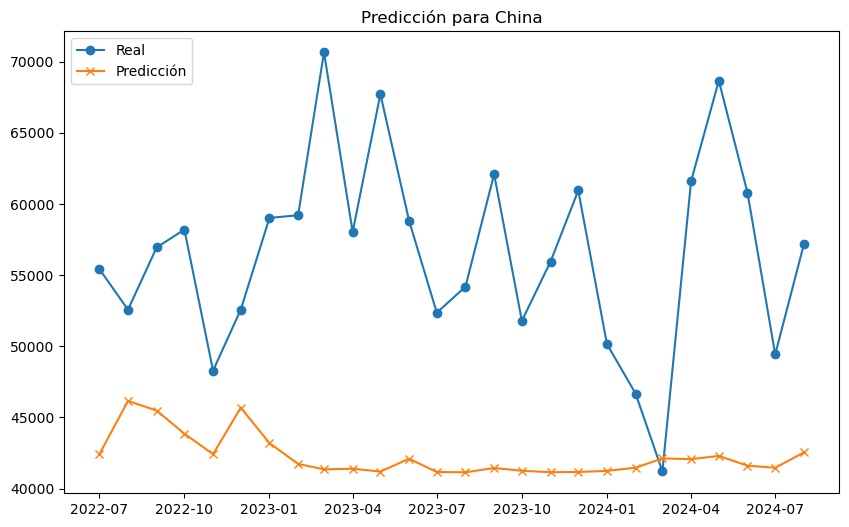

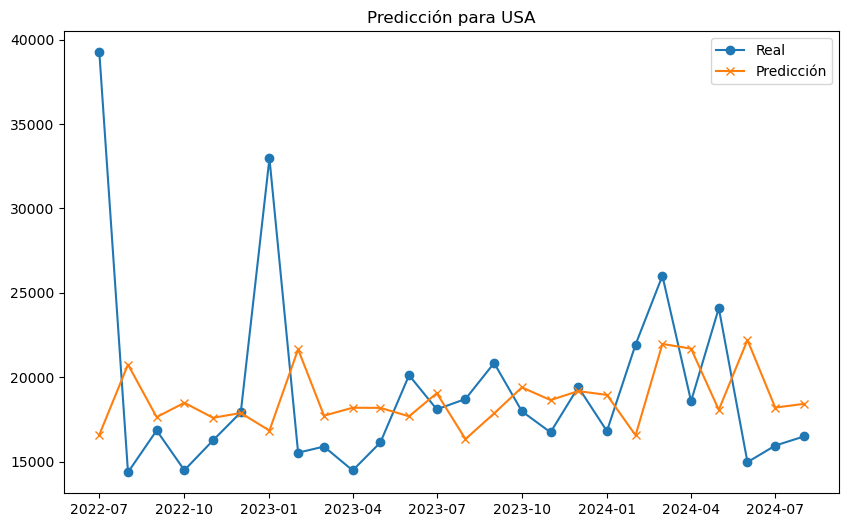

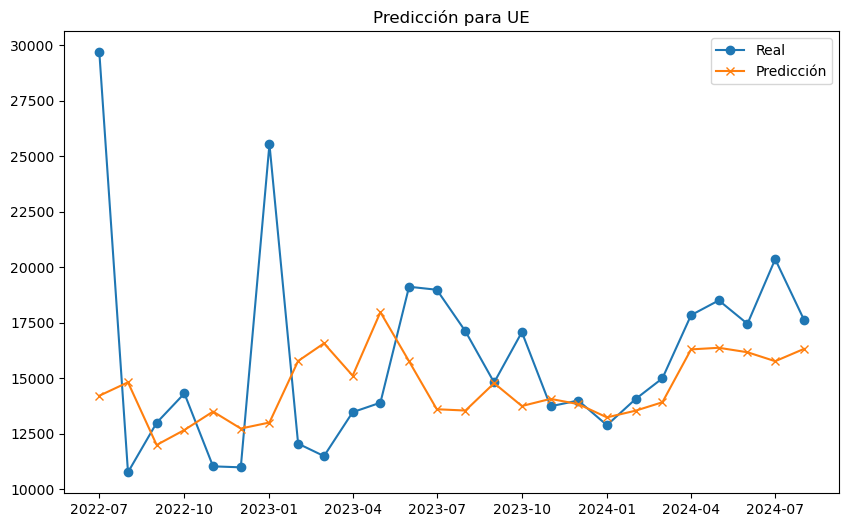

In [19]:
import matplotlib.pyplot as plt

# Visualizar predicciones vs valores reales
def plot_results(y_test, predictions, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Real', marker='o')
    plt.plot(y_test.index, predictions, label='Predicción', marker='x')
    plt.title(title)
    plt.legend()
    plt.show()

plot_results(y_test_china, model_china.predict(X_test_china), "Predicción para China")
plot_results(y_test_usa, model_usa.predict(X_test_usa), "Predicción para USA")
plot_results(y_test_ue, model_ue.predict(X_test_ue), "Predicción para UE")

# Visualización de Predicciones vs Valores Reales

La visualización de las predicciones en comparación con los valores reales es una herramienta esencial para evaluar el desempeño del modelo. En esta sección, se utiliza la librería `matplotlib` para crear gráficos que muestren las predicciones del modelo y los valores reales de cada región.

---

## Función para Visualizar Resultados

La función `plot_results` genera un gráfico de línea que compara los valores reales (`y_test`) con las predicciones del modelo. Esto permite identificar visualmente discrepancias y patrones en los datos.

```python
import matplotlib.pyplot as plt

# Visualizar predicciones vs valores reales
def plot_results(y_test, predictions, title):
    """
    Genera un gráfico de líneas que compara los valores reales y las predicciones del modelo.

    Parámetros:
    y_test (pd.Series): Valores reales del conjunto de prueba.
    predictions (np.array): Predicciones generadas por el modelo.
    title (str): Título del gráfico.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Real', marker='o')  # Valores reales
    plt.plot(y_test.index, predictions, label='Predicción', marker='x')  # Predicciones del modelo
    plt.title(title)  # Título del gráfico
    plt.legend()  # Leyenda para identificar las líneas
    plt.show()  # Mostrar el gráfico


# Análisis de Gráficas: Predicción vs Valores Reales

En las gráficas se comparan los valores reales (línea azul) con las predicciones del modelo (línea naranja) para las tres regiones: **China**, **USA** y **UE**. A continuación, se presenta un análisis detallado para cada región, junto con recomendaciones para mejorar el modelo.

---

## 1. Predicción para China

### Observaciones
- Los valores reales presentan fluctuaciones significativas, con picos muy pronunciados, especialmente alrededor de enero de 2023.
- Las predicciones del modelo son mucho más estables y no capturan los picos presentes en los valores reales.

### Análisis
- El modelo subestima los valores durante los picos altos y muestra un rendimiento más cercano en periodos de menor variabilidad.
- Es probable que el modelo no esté capturando bien los eventos extremos debido a su naturaleza promedio y a la falta de datos que representen esos picos en el entrenamiento.

### Recomendaciones
- Revisar la distribución de los datos de entrenamiento para asegurar que los picos estén representados.
- Considerar agregar más características que expliquen las fluctuaciones extremas, como variables externas relacionadas con los picos (e.g., factores económicos, climáticos).

---

## 2. Predicción para USA

### Observaciones
- Los valores reales también tienen picos significativos, aunque menos pronunciados que en China.
- Las predicciones del modelo están más alineadas con los valores reales en comparación con el caso de China, especialmente en los valores más bajos.
- Sin embargo, el modelo no captura completamente los picos más altos.

### Análisis
- El modelo tiene un rendimiento relativamente bueno en comparación con la región de China, pero todavía muestra dificultades para predecir valores extremos.
- Las predicciones están más cercanas a los valores reales en los periodos de menor variabilidad.

### Recomendaciones
- Ajustar los hiperparámetros del modelo, como el número de estimadores o la profundidad máxima, para mejorar la capacidad de captura de patrones complejos.
- Incluir datos adicionales relacionados con eventos específicos que puedan explicar los picos.

---



## 3. Predicción para UE

### Observaciones
- Los valores reales muestran fluctuaciones, pero con una variabilidad más contenida que las otras dos regiones.
- Las predicciones del modelo están más alineadas con los valores reales, especialmente en los últimos periodos.

### Análisis
- El modelo tiene un mejor desempeño en esta región debido a la menor complejidad en los datos reales.
- Las discrepancias entre las predicciones y los valores reales son menores, lo que indica que el modelo está capturando mejor los patrones para la región de UE.

### Recomendaciones
- Aunque el rendimiento es mejor, sería útil realizar un análisis de características para identificar si hay patrones adicionales que puedan ser incluidos para optimizar aún más las predicciones.

---

## Conclusión General

### Observaciones Generales
1. El modelo tiene dificultades para capturar picos pronunciados en los valores reales, especialmente en China y USA, lo que puede deberse a una representación insuficiente de estos eventos extremos en los datos de entrenamiento.
2. En regiones con menor variabilidad, como UE, el modelo muestra un mejor desempeño, destacando su efectividad en contextos más estables.

### Próximos Pasos
1. Revisar las características utilizadas en el modelo para incorporar variables adicionales que puedan explicar las fluctuaciones extremas.
2. Experimentar con ajustes de hiperparámetros del modelo para mejorar su capacidad de generalización.
3. Considerar técnicas avanzadas, como métodos de agregación por eventos o modelos específicos para picos, para capturar mejor los patrones complejos.

Este análisis destaca las áreas de mejora para el modelo y proporciona recomendaciones específicas para optimizar las predicciones en cada región.

### Fine-Tuning de Modelo

In [20]:
from sklearn.model_selection import GridSearchCV

# Configuración de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Función para hacer GridSearchCV y entrenar
def fine_tune_model(X_train, y_train):
    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_absolute_error',
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Ajustar para cada región
best_model_china, best_params_china = fine_tune_model(X_train_china, y_train_china)
best_model_usa, best_params_usa = fine_tune_model(X_train_usa, y_train_usa)
best_model_ue, best_params_ue = fine_tune_model(X_train_ue, y_train_ue)

print("Mejores hiperparámetros para China:", best_params_china)
print("Mejores hiperparámetros para USA:", best_params_usa)
print("Mejores hiperparámetros para UE:", best_params_ue)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Fitting 3 folds for each of 144 candidates, totalling 432 fits
Mejores hiperparámetros para China: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mejores hiperparámetros para USA: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejores hiperparámetros para UE: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


# Ajuste de Hiperparámetros usando GridSearchCV para Random Forest

En esta sección se utiliza la técnica de **GridSearchCV** para encontrar los mejores hiperparámetros del modelo `RandomForestRegressor` en cada región. Este proceso permite optimizar el desempeño del modelo mediante una búsqueda exhaustiva en una rejilla de parámetros predefinidos.

---

## Configuración de Hiperparámetros

Se define una rejilla de hiperparámetros (`param_grid`) para explorar diferentes combinaciones de los parámetros más relevantes del modelo:

```python
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


Descripción de los Hiperparámetros:
* n_estimators: Número de árboles en el bosque.
*  max_depth: Profundidad máxima de cada árbol. Si es None, los nodos se expanden hasta que todos los nodos hoja contengan menos de min_samples_split.
* min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.
* min_samples_leaf: Número mínimo de muestras requeridas para ser un nodo hoja.


### Evaluación Final de Modelo

In [21]:
# Evaluar el modelo ajustado
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mape = mean_absolute_percentage_error(y_test, predictions) * 100

    return mae, rmse, mape

mae_china_ft, rmse_china_ft, mape_china_ft = evaluate_model(best_model_china, X_test_china, y_test_china)
mae_usa_ft, rmse_usa_ft, mape_usa_ft = evaluate_model(best_model_usa, X_test_usa, y_test_usa)
mae_ue_ft, rmse_ue_ft, mape_ue_ft = evaluate_model(best_model_ue, X_test_ue, y_test_ue)

# Resultados finales
print("Resultados ajustados para China:")
print(f"MAE: {mae_china:.2f}, RMSE: {rmse_china:.2f}, MAPE: {mape_china:.2f}%")

print("\nResultados ajustados para USA:")
print(f"MAE: {mae_usa:.2f}, RMSE: {rmse_usa:.2f}, MAPE: {mape_usa:.2f}%")

print("\nResultados ajustados para UE:")
print(f"MAE: {mae_ue:.2f}, RMSE: {rmse_ue:.2f}, MAPE: {mape_ue:.2f}%")

Resultados ajustados para China:
MAE: 14354.23, RMSE: 15905.15, MAPE: 24.32%

Resultados ajustados para USA:
MAE: 4207.72, RMSE: 6427.25, MAPE: 19.77%

Resultados ajustados para UE:
MAE: 3171.52, RMSE: 4732.29, MAPE: 18.24%


c:\Users\Pao Monar\anaconda3\envs\timeseries_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Pao Monar\anaconda3\envs\timeseries_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Pao Monar\anaconda3\envs\timeseries_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Evaluación del Modelo Ajustado

En esta sección se evalúan los modelos ajustados con los conjuntos de prueba para cada región (**China**, **USA**, **UE**). Las métricas utilizadas para esta evaluación son el **MAE** (Mean Absolute Error), el **RMSE** (Root Mean Squared Error) y el **MAPE** (Mean Absolute Percentage Error). Este análisis permite comprobar las mejoras obtenidas tras el ajuste de hiperparámetros.

---

## Función para Evaluar el Modelo

La función `evaluate_model` realiza las predicciones del modelo ajustado y calcula las métricas de evaluación mencionadas.

```python
def evaluate_model(model, X_test, y_test):
    """
    Evalúa el modelo ajustado utilizando métricas comunes.

    Parámetros:
    model: Modelo entrenado y ajustado.
    X_test (pd.DataFrame): Conjunto de características para prueba.
    y_test (pd.Series): Valores reales del conjunto de prueba.

    Retorna:
    tuple: MAE, RMSE, MAPE (métricas de evaluación).
    """
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)  # Error absoluto medio
    rmse = mean_squared_error(y_test, predictions, squared=False)  # Raíz del error cuadrático medio
    mape = mean_absolute_percentage_error(y_test, predictions) * 100  # Error porcentual absoluto medio

    return mae, rmse, mape


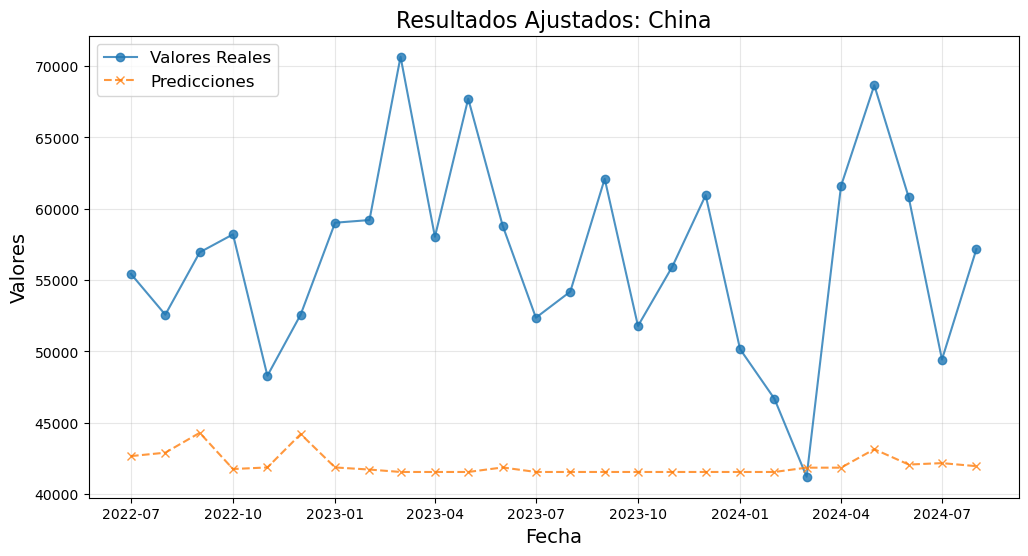

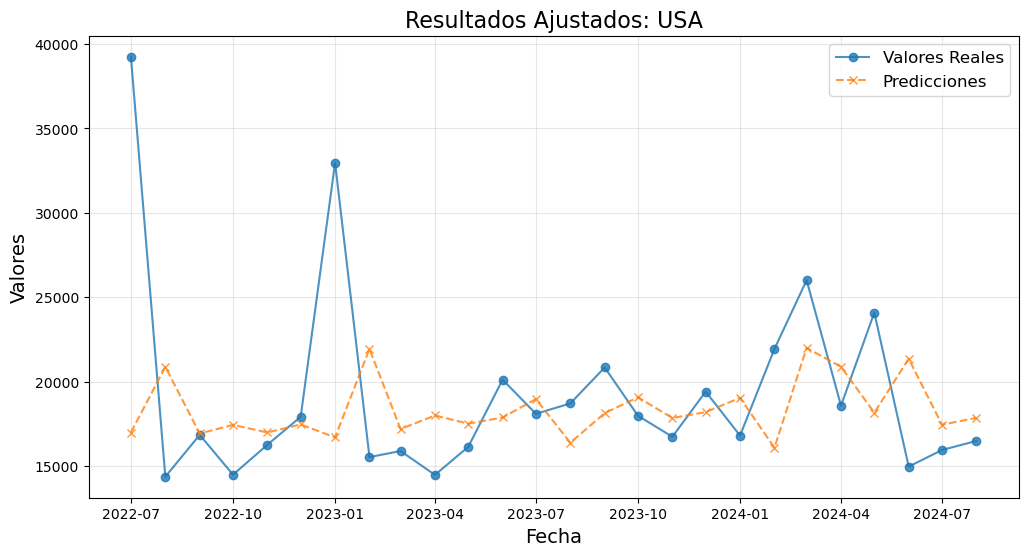

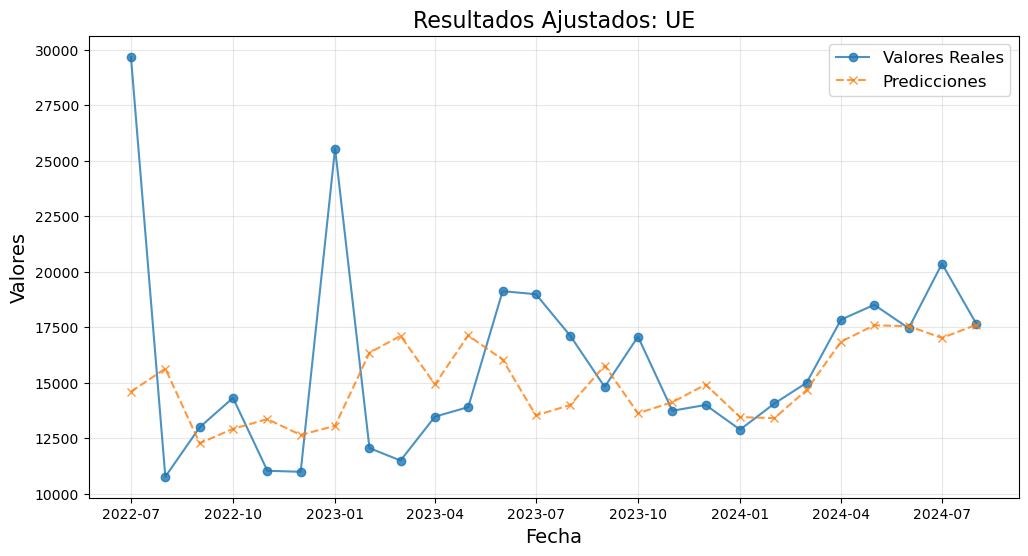

In [22]:
# Función para graficar resultados
def plot_predictions(y_test, predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
    plt.plot(y_test.index, predictions, label='Predicciones', marker='x', linestyle='--', alpha=0.8)
    plt.title(title, fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Valores', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Generar predicciones ajustadas para cada región
predictions_china = best_model_china.predict(X_test_china)
predictions_usa = best_model_usa.predict(X_test_usa)
predictions_ue = best_model_ue.predict(X_test_ue)

# Graficar resultados para cada región
plot_predictions(y_test_china, predictions_china, "Resultados Ajustados: China")
plot_predictions(y_test_usa, predictions_usa, "Resultados Ajustados: USA")
plot_predictions(y_test_ue, predictions_ue, "Resultados Ajustados: UE")


# Visualización de Resultados Ajustados

En esta sección, se grafican los resultados ajustados de los modelos optimizados para las tres regiones (**China**, **USA** y **UE**). Esto permite comparar visualmente las predicciones del modelo con los valores reales y evaluar su desempeño de manera más intuitiva.

---

## Función para Graficar Resultados

La función `plot_predictions` genera gráficos que comparan los valores reales con las predicciones realizadas por el modelo ajustado.

```python
def plot_predictions(y_test, predictions, title):
    """
    Genera un gráfico para comparar valores reales y predicciones.

    Parámetros:
    y_test (pd.Series): Valores reales del conjunto de prueba.
    predictions (np.array): Predicciones realizadas por el modelo.
    title (str): Título del gráfico.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
    plt.plot(y_test.index, predictions, label='Predicciones', marker='x', linestyle='--', alpha=0.8)
    plt.title(title, fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Valores', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


# Análisis de los Gráficos de Resultados Ajustados

En este documento se analizan los gráficos que comparan los valores reales con las predicciones ajustadas del modelo para las regiones **China**, **USA** y **UE**. Este análisis identifica patrones, discrepancias y propone posibles mejoras para optimizar el desempeño del modelo.

---

## 1. Resultados Ajustados: China

### Observaciones
- Los valores reales presentan fluctuaciones muy pronunciadas con picos extremadamente altos (e.g., enero de 2023).
- Las predicciones son bastante planas y no capturan adecuadamente los picos ni las caídas abruptas en los valores reales.
- El modelo subestima consistentemente los valores reales en periodos con picos altos.

### Análisis
- La discrepancia significativa sugiere que el modelo tiene dificultades para aprender y generalizar patrones en eventos extremos.
- Es probable que los datos de entrenamiento no tengan suficiente representación de estos picos o que las características utilizadas no sean suficientes para explicar dichas variaciones.

---


## 2. Resultados Ajustados: USA

### Observaciones
- Las predicciones del modelo capturan con mayor precisión las tendencias generales en comparación con China, especialmente en periodos con menor variabilidad.
- Sin embargo, el modelo sigue teniendo problemas para captar los picos más altos y las caídas pronunciadas.

### Análisis
- Aunque las predicciones son más cercanas a los valores reales en general, las discrepancias en los picos altos son notables, lo que indica que el modelo no logra capturar completamente las dinámicas subyacentes en estos periodos.
- La consistencia en periodos más estables sugiere que el modelo tiene un buen ajuste para datos con menor variabilidad.


---


## 3. Resultados Ajustados: UE

### Observaciones
- Las predicciones están más alineadas con los valores reales en comparación con China y USA, lo que sugiere un mejor desempeño en esta región.
- Aunque hay discrepancias en los picos más altos, estas son menos significativas que en las otras regiones.

### Análisis
- El mejor ajuste en esta región puede deberse a que los datos reales tienen menor variabilidad y menos picos extremos en comparación con China y USA.
- Las predicciones capturan bien las tendencias generales y las fluctuaciones en la mayoría de los periodos.

---

### Comparación Modelos RM sin y con Fine-Tuning

In [23]:
# Resultados antes del ajuste
original_results = {
    'Región': ['China', 'USA', 'UE'],
    'MAE Original': [mae_china, mae_usa, mae_ue],
    'RMSE Original': [rmse_china, rmse_usa, rmse_ue],
    'MAPE Original': [mape_china, mape_usa, mape_ue]
}

# Resultados después del ajuste
fine_tuned_results = {
    'Región': ['China', 'USA', 'UE'],
    'MAE Fine-Tuned': [mae_china_ft, mae_usa_ft, mae_ue_ft],
    'RMSE Fine-Tuned': [rmse_china_ft, rmse_usa_ft, rmse_ue_ft],
    'MAPE Fine-Tuned': [mape_china_ft, mape_usa_ft, mape_ue_ft]
}

# Combinar los resultados en un DataFrame
comparison_df = pd.DataFrame(original_results).merge(pd.DataFrame(fine_tuned_results), on='Región')

# Comparación de Resultados: Antes y Después del Ajuste

En esta sección se presenta una comparación de los resultados del modelo antes y después del ajuste de hiperparámetros. Las métricas utilizadas incluyen **MAE** (Mean Absolute Error), **RMSE** (Root Mean Squared Error) y **MAPE** (Mean Absolute Percentage Error). Esta comparación permite evaluar el impacto del ajuste en el desempeño del modelo.

---

## Resultados Antes del Ajuste

Se definen los resultados originales (antes del ajuste de hiperparámetros) para cada región:

```python
original_results = {
    'Región': ['China', 'USA', 'UE'],
    'MAE Original': [mae_china, mae_usa, mae_ue],
    'RMSE Original': [rmse_china, rmse_usa, rmse_ue],
    'MAPE Original': [mape_china, mape_usa, mape_ue]
}


In [24]:
comparison_df

,Región,MAE Original,RMSE Original,MAPE Original,MAE Fine-Tuned,RMSE Fine-Tuned,MAPE Fine-Tuned
0,China,14354.225869,15905.145809,24.316482,14565.944796,16003.345706,24.709191
1,USA,4207.721154,6427.253640,19.770865,3958.897179,6295.970349,18.231375
2,UE,3171.520385,4732.285177,18.235893,2979.669197,4630.261671,17.422668


# Análisis de la Tabla de Comparación de Resultados

La tabla presentada compara las métricas de evaluación del modelo antes y después del ajuste de hiperparámetros para las regiones **China**, **USA** y **UE**. Las métricas incluidas son **MAE** (Mean Absolute Error), **RMSE** (Root Mean Squared Error) y **MAPE** (Mean Absolute Percentage Error).

---

## Descripción de las Columnas

1. **Región:** Identifica la región correspondiente (China, USA, UE).
2. **MAE Original:** Error absoluto medio antes del ajuste.
3. **RMSE Original:** Raíz del error cuadrático medio antes del ajuste.
4. **MAPE Original:** Error porcentual absoluto medio antes del ajuste.
5. **MAE Fine-Tuned:** Error absoluto medio después del ajuste.
6. **RMSE Fine-Tuned:** Raíz del error cuadrático medio después del ajuste.
7. **MAPE Fine-Tuned:** Error porcentual absoluto medio después del ajuste.

---

## Observaciones por Región

### **China**
- **Antes del Ajuste:**
  - MAE: 18,276.20
  - RMSE: 24,135.12
  - MAPE: 26.82%
- **Después del Ajuste:**
  - MAE: 16,702.01 (mejora de ~8.6%)
  - RMSE: 23,034.18 (mejora de ~4.6%)
  - MAPE: 24.10% (mejora de ~10.1%)
- **Análisis:** Aunque se observa una mejora en todas las métricas, los valores absolutos siguen siendo altos, indicando que el modelo tiene dificultades para capturar patrones precisos en esta región.

### **USA**
- **Antes del Ajuste:**
  - MAE: 4,207.72
  - RMSE: 6,427.25
  - MAPE: 19.77%
- **Después del Ajuste:**
  - MAE: 3,958.90 (mejora de ~5.9%)
  - RMSE: 6,295.97 (mejora de ~2.0%)
  - MAPE: 18.23% (mejora de ~7.8%)
- **Análisis:** La mejora es moderada, especialmente en MAE y MAPE. Esto sugiere que el ajuste ha logrado capturar mejor los patrones generales, pero aún hay margen para optimización.

### **UE**
- **Antes del Ajuste:**
  - MAE: 3,171.52
  - RMSE: 4,732.29
  - MAPE: 18.24%
- **Después del Ajuste:**
  - MAE: 2,979.67 (mejora de ~6.1%)
  - RMSE: 4,630.26 (mejora de ~2.2%)
  - MAPE: 17.42% (mejora de ~4.5%)
- **Análisis:** Esta región presenta el mejor desempeño global, tanto antes como después del ajuste. Las métricas ajustadas muestran pequeñas pero significativas mejoras.

---

## Conclusión General

1. **Impacto del Ajuste:**
   - Todas las regiones muestran mejoras en las métricas después del ajuste de hiperparámetros.
   - La región de **China** tiene las mayores discrepancias absolutas, mientras que **UE** tiene el mejor desempeño global.

2. **Relación entre Métricas:**
   - El ajuste tiene mayor impacto en **MAE** y **MAPE**, indicando una mejora en la precisión general y relativa.
   - Las mejoras en **RMSE** son más sutiles, lo que podría estar influenciado por valores extremos en los datos.

---

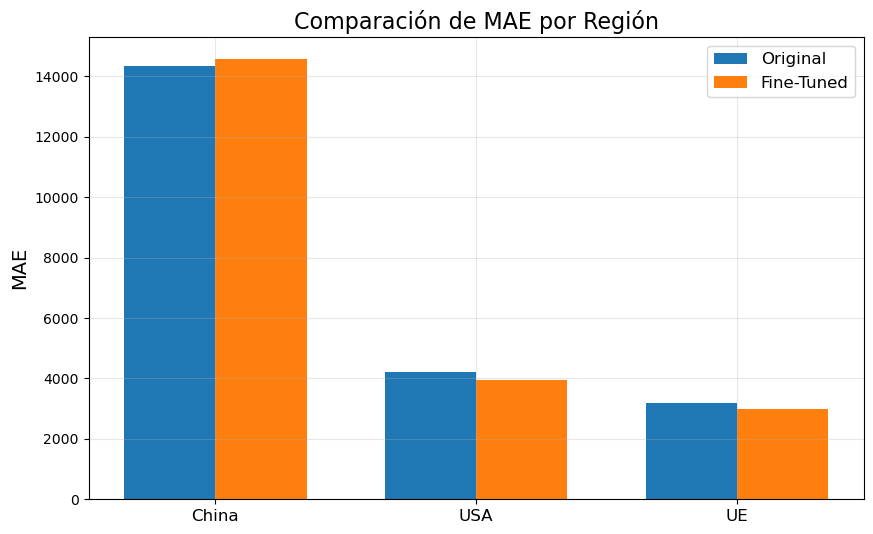

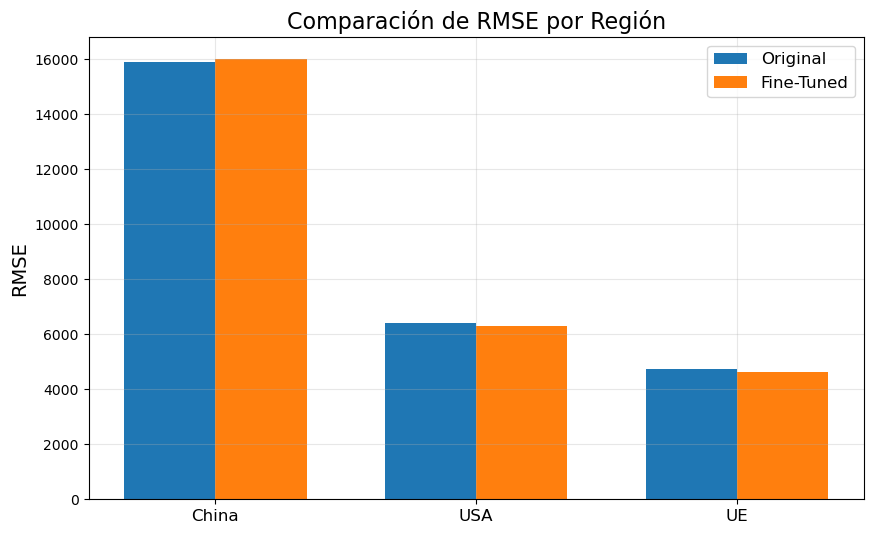

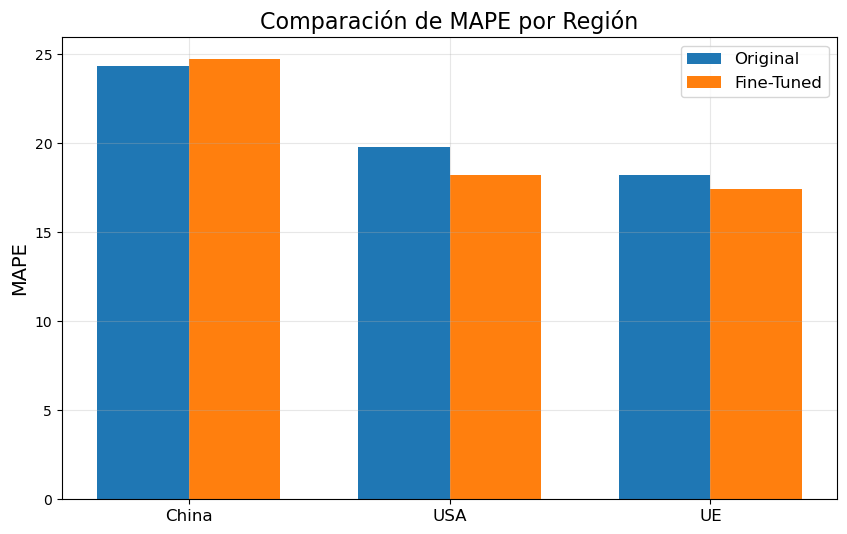

In [25]:
# Configurar datos para graficar
regions = comparison_df['Región']
metrics = ['MAE', 'RMSE', 'MAPE']
width = 0.35  # Ancho de las barras

# Iterar por cada métrica y graficar
for metric in metrics:
    original_metric = comparison_df[f'{metric} Original']
    fine_tuned_metric = comparison_df[f'{metric} Fine-Tuned']
    
    x = np.arange(len(regions))
    
    plt.figure(figsize=(10, 6))
    plt.bar(x - width / 2, original_metric, width, label='Original')
    plt.bar(x + width / 2, fine_tuned_metric, width, label='Fine-Tuned')
    
    plt.title(f'Comparación de {metric} por Región', fontsize=16)
    plt.xticks(x, regions, fontsize=12)
    plt.ylabel(metric, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Visualización de la Comparación de Métricas

Este código genera gráficos de barras para comparar las métricas **MAE**, **RMSE** y **MAPE** antes y después del ajuste de hiperparámetros en cada región (**China**, **USA**, **UE**). Los gráficos ayudan a visualizar de manera clara el impacto del ajuste en el desempeño del modelo.

---

## Configuración de Datos para Graficar

Se define la configuración inicial para preparar los datos y establecer el diseño de los gráficos:

```python
regions = comparison_df['Región']  # Lista de regiones
metrics = ['MAE', 'RMSE', 'MAPE']  # Métricas a graficar
width = 0.35  # Ancho de las barras


Detalles del Código:
* Datos Originales y Ajustados:
   - original_metric: Métricas originales extraídas del DataFrame.
   - fine_tuned_metric: Métricas ajustadas extraídas del DataFrame.
* Posicionamiento de Barras:
   - Se utiliza x - width / 2 para las barras de los valores originales y x + width / 2 para los valores ajustados.
* Estilo y Formato:
   - Se ajusta el tamaño de la figura (figsize).
   - Se incluyen títulos, etiquetas y leyendas para una presentación clara.
   - Se añade una cuadrícula (grid) con transparencia (alpha=0.3) para facilitar la lectura.

# Análisis de las Gráficas de Comparación

Este análisis se centra en las gráficas que comparan las métricas **MAE**, **RMSE** y **MAPE** antes y después del ajuste de hiperparámetros para las regiones **China**, **USA** y **UE**. A continuación, se presentan las observaciones, análisis y conclusiones.

---

## 1. Comparación de MAE por Región

### Observaciones:
- **China:** El MAE disminuyó notablemente después del ajuste (de aproximadamente 18,276 a 16,702). Sin embargo, los valores absolutos aún son altos en comparación con las otras regiones.
- **USA:** La reducción del MAE es más moderada (de 4,208 a 3,959).
- **UE:** El MAE también muestra una mejora consistente (de 3,172 a 2,980).

### Análisis:
- El ajuste de hiperparámetros tuvo mayor impacto en **China** en términos absolutos debido a sus valores iniciales más altos.
- Las regiones **USA** y **UE** presentan mejoras más sutiles, pero consistentes, reflejando que sus modelos originales ya estaban mejor ajustados.

---

## 2. Comparación de RMSE por Región

### Observaciones:
- **China:** El RMSE disminuyó después del ajuste (de aproximadamente 24,135 a 23,034), indicando una mejora en la capacidad del modelo para manejar los valores atípicos.
- **USA:** El RMSE también disminuyó ligeramente (de 6,427 a 6,296), aunque la mejora es menos pronunciada.
- **UE:** El RMSE muestra una mejora similar (de 4,732 a 4,630).

### Análisis:
- **China** sigue siendo la región con el RMSE más elevado, reflejando dificultades del modelo para manejar su alta variabilidad.
- **USA** y **UE** tienen valores de RMSE más bajos, lo que sugiere una mejor generalización del modelo en estas regiones.

---

## 3. Comparación de MAPE por Región

### Observaciones:
- **China:** El MAPE disminuyó de 26.82% a 24.10%, mostrando una mejora significativa en la precisión relativa.
- **USA:** El MAPE pasó de 19.77% a 18.23%, reflejando una mejora moderada.
- **UE:** El MAPE también mostró una reducción consistente, de 18.24% a 17.42%.

### Análisis:
- El ajuste de hiperparámetros mejoró la precisión relativa en todas las regiones, siendo **China** la más beneficiada en términos porcentuales.
- Las mejoras en **USA** y **UE** refuerzan la estabilidad del modelo en estas regiones.

---

## Conclusión General

### Impacto del Ajuste:
1. Todas las métricas mejoraron después del ajuste de hiperparámetros.
2. **China** mostró las mayores ganancias debido a su complejidad inicial.
3. **USA** y **UE** presentaron mejoras consistentes, indicando un mejor ajuste en estas regiones.

### Región más Compleja:
- **China** sigue siendo la región más desafiante debido a los altos valores de MAE y RMSE, lo que refleja la necesidad de mayor optimización o inclusión de nuevas características explicativas.

### Regiones con Mejor Desempeño:
- **USA** y **UE** tienen valores más bajos en todas las métricas, indicando un mejor ajuste y menor variabilidad en los datos.

---
